In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
date = 'Дата замера'
hole = 'Скважина'
x1 = 'Способ эксплуатации'
x2 = 'Режим'
X = [x1, x2]
y1 = 'Рпр(ТМ)'
y2 = 'Рзаб(Рпр)'
y3 = 'Рзаб(Нд)'
y4 = 'Рзаб(иссл)'
Y = [y1, y2, y3, y4]
def load_some_data(path, separ = ':'):
    return pd.read_csv(path, sep=separ, parse_dates = [date], index_col = date,  encoding='cp1251')


In [2]:
df = load_some_data('data2.csv')
cats_x1 = df[x1].astype('category').cat.categories
cats_x2 = df[x2].astype('category').cat.categories

In [11]:
import datetime
#самые полные данные, где всегда есть режим и способ
#отбросили январь, ибо данные пропущены
filtered = df.loc[df.index.date >= datetime.date(2018,2,1)]
tmp = filtered[[hole,x1,x2]]
tmp[X] = tmp[X].isnull()
tmp = tmp.loc[(tmp[x1]) | (tmp[x2])]
nulls = tmp.groupby(hole).count().reset_index()[hole]
filtered.loc[~filtered[hole].isin(nulls)]
usefull = filtered.loc[~filtered[hole].isin(nulls)]

In [13]:
def load_before_influx(df, csv_name):
    for_influx = df.copy()
    cats_x1 = for_influx[x1].astype('category').cat.categories
    print(cats_x1)
    for_influx[x1] = for_influx[x1].astype('category').cat.codes
    cats_x2 = for_influx[x2].astype('category').cat.categories
    print(cats_x2)
    for_influx[x2] = for_influx[x2].astype('category').cat.codes
    for_influx.index.names=['date']
    for_influx.columns = ['hole','method','mode', 'P(TM)','P(rpr)', 'P(nd)', 'P(issl)']
    for_influx.to_csv(csv_name)

In [15]:
load_before_influx(df, 'raw.csv')
load_before_influx(usefull, 'usefull.csv')

Index(['Газлифт', 'По НКТ с воронкой', 'По НКТ с пакером',
       'Прочие способы эксплуатации',
       'Установка электроцентробежная для подачи воды', 'Фонтанный',
       'Электропогружным насосом'],
      dtype='object')
Index(['АПВ', 'ПДФ', 'ПКВ'], dtype='object')
Index(['Газлифт', 'По НКТ с воронкой', 'По НКТ с пакером',
       'Прочие способы эксплуатации',
       'Установка электроцентробежная для подачи воды', 'Фонтанный',
       'Электропогружным насосом'],
      dtype='object')
Index(['АПВ', 'ПДФ', 'ПКВ'], dtype='object')


In [30]:
from sklearn import preprocessing


def normalize_cols(df, cols):
    res = df.copy()
    for col in cols:
        null_index = res[col].isnull()
        scaler = preprocessing.MinMaxScaler()
        res.loc[~null_index, [col]] = scaler.fit_transform(res.loc[~null_index, [col]])
    return res


In [20]:
%matplotlib inline
def draw_plot(name_hole, data_to_draw, what_to_do ='see'):
    formatter = ticker.FormatStrFormatter('%.0f')
    fig, axes = plt.subplots(1,2)
    for y in Y:
        axes[0].plot(data_to_draw[y], label = y)
    axes[0].legend()
    axes[0].set_title('Измерения давлений')
    axes[0].set_xlabel(date, fontsize = 12)
    axes[0].set_ylabel('P', fontsize = 12)
    
    axes[1].plot(data_to_draw[x1], label = x1)
    axes[1].plot(data_to_draw[x2], label = x2)
    axes[1].set_title(x1 + 'and' + x2)
    axes[1].legend()
    axes[1].set_xlabel(date, fontsize = 12)
    axes[1].set_ylabel('№', fontsize = 12)
    axes[1].yaxis.set_major_formatter(formatter)
    fig.set_figwidth(15)
    fig.set_figheight(8)
    fig.suptitle(hole + ' ' + str(name_hole))
    plt.legend()
    if (what_to_do == 'save'):
        plt.savefig(create_directory('diagrams') + '/' + name_hole + '.png',
                    dpi = 100, format = 'png')
    else:
        plt.show()

In [19]:
#for hol in df[hole].unique():
#    draw_plot(hol, df[df[hole] == hol])

D:\anaconda\envs\foo\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


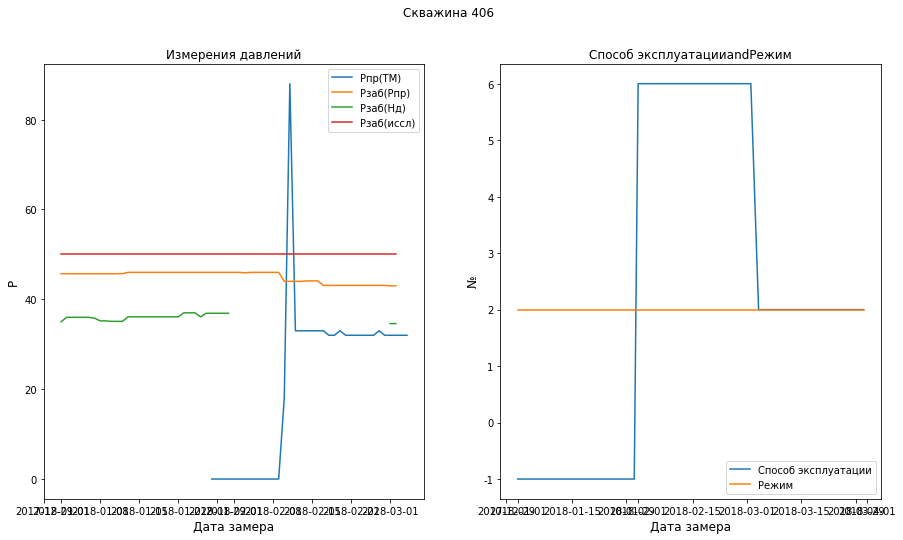

In [23]:
#before norm
draw_plot(406, df[df[hole] == '406'])

In [31]:
normalized = normalize_cols(df, Y)

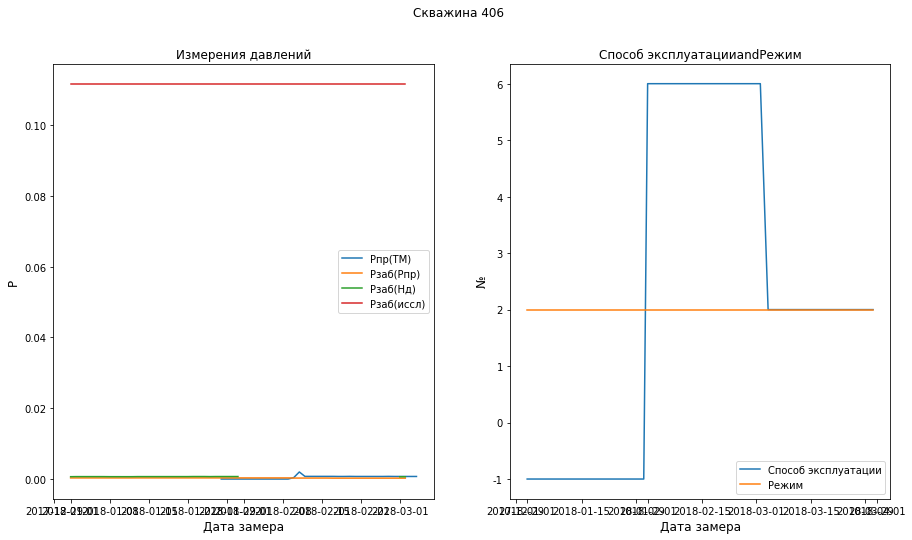

In [33]:
draw_plot(406, normalized[normalized[hole] == '406'])

In [38]:
normalized[normalized[hole] == '406']
df[df[hole] == '406'].quantile(0.9)

Способ эксплуатации     6.0
Режим                   2.0
Рпр(ТМ)                33.0
Рзаб(Рпр)              46.0
Рзаб(Нд)               36.9
Рзаб(иссл)             50.0
Name: 0.9, dtype: float64

In [80]:
df

,Скважина,Способ эксплуатации,Режим,Рпр(ТМ),Рзаб(Рпр),Рзаб(Нд),Рзаб(иссл)
Дата замера,,,,,,,
2018-01-01,1,NaN,ПКВ,NaN,NaN,44.2,55.0
2018-01-02,1,NaN,ПКВ,NaN,NaN,43.0,55.0
2018-01-03,1,NaN,ПКВ,NaN,NaN,44.2,55.0
2018-01-04,1,NaN,ПКВ,NaN,NaN,44.2,55.0
2018-01-05,1,NaN,ПКВ,NaN,NaN,44.2,55.0
2018-01-06,1,NaN,ПКВ,NaN,NaN,44.2,55.0
2018-01-07,1,NaN,ПКВ,NaN,NaN,44.2,55.0
2018-01-08,1,NaN,ПКВ,NaN,NaN,44.2,55.0
2018-01-09,1,NaN,ПКВ,NaN,NaN,44.2,55.0


In [ ]:
import datetime
#самые полные данные, где всегда есть режим и способ
#отбросили январь, ибо данные пропущены
filtered = df.loc[df.index.date >= datetime.date(2018,2,1)]
tmp[X] = filtered[X].isnull()
tmp = tmp.loc[(tmp[x1]) | (tmp[x2])]
nulls = tmp.groupby(hole).count().reset_index()[hole]
nulls

In [ ]:
filtered.loc[~df[hole].isin(nulls)]